Giving raw data downloaded from this link https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls

Base on the data, we will formulate a linear regression model for 'propery crime'. Evaluate the how fit  

From the model, we can predict 'property crime' from values of the rest columns.

In [28]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict

In [9]:
df = pd.read_excel(open('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls','rb'), sheetname='13tbl8ny', skiprows = 4)
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [10]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,3.480000e+02,348.000000,348.000000,0.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,187.000000
mean,4.003763e+04,201.594828,1.566092,NaN,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.871658
std,4.500374e+05,2815.268504,18.303673,NaN,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,10.693411
min,5.260000e+02,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,NaN,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,NaN,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000
75%,1.842750e+04,22.000000,0.000000,NaN,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,1.000000
max,8.396126e+06,52384.000000,335.000000,NaN,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000


Comment: Rape (revised definition)1 seems missing information in the table. How many rows have no data?

In [11]:
print("There are %d cities and %d criminal types" %(df.shape[0], df.shape[1]))
df.isnull().sum()

There are 351 cities and 13 criminal types


City                                        0
Population                                  3
Violent\ncrime                              3
Murder and\nnonnegligent\nmanslaughter      3
Rape\n(revised\ndefinition)1              351
Rape\n(legacy\ndefinition)2                 3
Robbery                                     3
Aggravated\nassault                         3
Property\ncrime                             3
Burglary                                    3
Larceny-\ntheft                             3
Motor\nvehicle\ntheft                       3
Arson3                                    164
dtype: int64

We have crime data of 351 cities. Cities are indexes, and won't be count in the model. We have no data in Rape\n(revised\ndefinition)1 and missing data in Arson3 columns, so we won't count these 2 columns in the model.



In [12]:
df_cp = df.drop(df.columns[[0,4,12]], axis=1)
df_cp.head()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
0,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0
1,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0
2,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0
3,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0
4,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0


In [16]:
import re
# df_cp.columns.str.replace('\n', '_')

df_cp.columns = [re.sub(r'\n|\)|\(|\n\(|-', '_', c) for c in df_cp.columns]
df_cp.columns

Index(['Population', 'Violent_crime', 'Murder and_nonnegligent_manslaughter',
       'Rape__legacy_definition_2', 'Robbery', 'Aggravated_assault',
       'Property_crime', 'Burglary', 'Larceny__theft', 'Motor_vehicle_theft'],
      dtype='object')

In [17]:
df_cp.head()

,Population,Violent_crime,Murder and_nonnegligent_manslaughter,Rape__legacy_definition_2,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny__theft,Motor_vehicle_theft
0,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0
1,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0
2,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0
3,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0
4,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0


Firstly, we want to know whether a relationship exists between 'property crime' and other variables: population, violent crime, ...

<h>1. Simple Linear Regression</h>

In [25]:
data = df_cp[["Population", "Property_crime"]].copy()
data = data.dropna()

In [27]:
lg=linear_model.LinearRegression()
model=lg.fit(data['Population'].values.reshape(data.shape[0],1),data['Property_crime'].values)
print ("formula: y = {0}x + {1}".format(model.coef_, model.intercept_))

formula: y = [ 0.01695663]x + 113.70298212788998


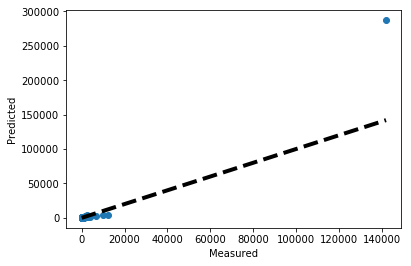

In [29]:
lr = linear_model.LinearRegression()
y=data.Property_crime.values
predicted = cross_val_predict(lr, data.Population.values.reshape(data.shape[0],1), data.Property_crime, cv=10)
fig = plt.figure()
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
model=lg.fit(df_cp[['Robbery','Violent_crime']]
             ,df_cp['Property_crime'].values)

In [ ]:
# visualize the relationship between the features and the response using scatterplots

## https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html#sphx-glr-gallery-subplots-axes-and-figures-subplots-demo-py
fig = plt.figure()
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(df.Population, df[['Property\ncrime']], 'r--')
ax.set_title('Population vs. Property crime')
ax.set_xlabel('Population')
ax.set_ylabel('Property crime')
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df.Arson3, df[['Property\ncrime']], c = 'b', marker = '+')
ax.set_title('Arson3 vs. Property crime')
ax.set_xlabel('Arson3')
ax.set_ylabel('Property crime')

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(17,5))
ax1.scatter(df[['Violent\ncrime']], df[['Property\ncrime']], c='r', marker='o')
ax1.set_title('Violent crime vs. Property crime')
ax2.scatter(df[['Murder and\nnonnegligent\nmanslaughter']], df[['Property\ncrime']], c='g', marker='+')
ax2.set_title('Murder and nonnegligent manslaughter vs. Property crime')
ax3.scatter(df[['Rape\n(legacy\ndefinition)2']], df[['Property\ncrime']], c='r', marker='+')
ax3.set_title('Rape (revised definition)2 vs. Property crime')

fig, axarr = plt.subplots(2, 3, sharey=True, figsize=(15,10))
axarr[0, 0].scatter(df[['Robbery']], df[['Property\ncrime']], c='r', marker='+')
axarr[0, 0].set_title('Robbery vs. Property crime')
axarr[0, 1].scatter(df[['Aggravated\nassault']], df[['Property\ncrime']], c='g', marker='+')
axarr[0, 1].set_title('Aggravated assault vs. Property crime')
axarr[0, 2].scatter(df[['Burglary']], df[['Property\ncrime']], c='r', marker='+')
axarr[0, 2].set_title('Burglary vs. Property crime')
axarr[1, 0].scatter(df[['Burglary']], df[['Property\ncrime']], c='r', marker='+')
axarr[1, 0].set_title('Burglary vs. Property crime')
axarr[1, 1].scatter(df[['Larceny-\ntheft']], df[['Property\ncrime']], c='g', marker='+')
axarr[1, 1].set_title('Larceny-theft vs. Property crime')
axarr[1, 2].scatter(df[['Motor\nvehicle\ntheft']], df[['Property\ncrime']], c='r', marker='+')
axarr[1, 2].set_title('Motor vehicle theft vs. Property crime')

plt.show()

Calculate regression model of Property crime 

<h1> Model2:  Linear for 2 variable: Population + violent </h1>

In [ ]:
Calculate mean square error:

Multiple regression equation:

<h1>Model3: Linear regression for all variables in table</h1>

In [ ]:
Compare error of 3 models to choose the best fit linear regression